In [1]:
import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(parent_dir)

# Change the current working directory to 'src'
src_dir = os.path.join(parent_dir, 'src')
os.chdir(src_dir)

import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
import pandas  as pd
import numpy as np
import re

from concurrent.futures import ThreadPoolExecutor
from data.preprocessing import *

from sklearn.manifold import TSNE
from umap import UMAP

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from scipy.sparse import hstack

from sklearn.naive_bayes import GaussianNB
    
# Load the SentenceTransformer model.
from sentence_transformers import SentenceTransformer

warnings.filterwarnings("ignore", message="...", category=FutureWarning)
warnings.filterwarnings("ignore", message="...", category=UserWarning)

seed = 0

# params = {'clustering_algo': GaussianNB, 'clustering_params': {'n_components': 11, 'covariance_type': 'full', 'random_state': 0}, 'metric': 'cosine', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 30}

NameError: name 'warnings' is not defined

# Apply NLP
- there were two outlier issues to add logic for-
    - non english words
    - "no description available"

Loaded from pickle file
view processing example-


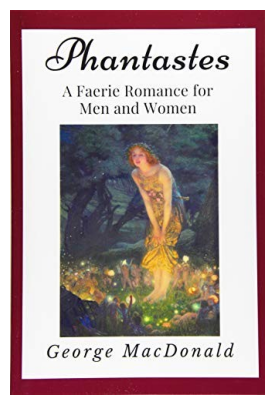

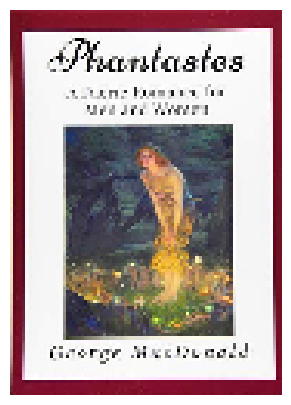

df shape post unknown date drop: (6060, 15) 

See decade distribution:



,work_id,edition_id,cover_url,title,authors,description,subjects,publish_date,genre,unprocessed_img,processed_img,reprocessed_img,reprocessed_img_shape,publish_yr,publish_decade
0,OL15450W,OL47243795M,https://covers.openlibrary.org/b/id/13687428-L...,Phantastes,George MacDonald,One of George MacDonald's most important works...,"Fairy tales, Scottish Fantasy fiction, Fiction...","Nov 05, 2019",Fantasy,"[[[126, 25, 41], [125, 24, 40], [124, 21, 38],...","[0.4941, 0.098, 0.1608, 0.4863, 0.08234, 0.149...","[0.49411765, 0.09803922, 0.16078432, 0.4881793...","(33000,)",2019,2010s
1,OL27495W,OL49943983M,https://covers.openlibrary.org/b/id/14545200-L...,The Silmarillion,J.R.R. Tolkien,A number-one New York Times bestseller when it...,"Fantasy fiction, Short stories, Middle Earth (...",23 gennaio 2013,Fantasy,"[[[0, 8, 11], [0, 8, 11], [0, 8, 11], [0, 8, 1...","[0.0, 0.03137, 0.04315, 0.0, 0.03137, 0.04315,...","[0.0, 0.03137255, 0.043137256, 0.0, 0.03137255...","(33000,)",2013,2010s
31,OL15437W,OL9785045M,https://covers.openlibrary.org/b/id/14363575-L...,Lilith,George MacDonald,"Lilith, written by the father of fantasy liter...","Fiction, romance, fantasy, Fiction, general, N...",1973-09,Fantasy,"[[[8, 10, 9], [8, 10, 9], [11, 11, 11], [19, 1...","[0.03137, 0.0392, 0.0353, 0.04315, 0.04315, 0....","[0.03137255, 0.039215688, 0.03529412, 0.082521...","(33000,)",1973,1970s
32,OL71124W,OL33336356M,https://covers.openlibrary.org/b/id/11959707-L...,The Last Battle,C.S. Lewis,"For the first time, an edition of Lewis's clas...","Juvenile Fiction, Science Fiction & Fantasy, F...",1986,Fantasy,"[[[138, 130, 117], [139, 131, 118], [140, 132,...","[0.541, 0.51, 0.4587, 0.549, 0.5176, 0.4666, 0...","[0.5411765, 0.50980395, 0.45882353, 0.554493, ...","(33000,)",1986,1980s
62,OL1449046W,OL43251544M,https://covers.openlibrary.org/b/id/13135704-L...,The Story of Doctor Dolittle,Hugh Lofting,There are some of us now reaching middle age w...,"Animals, Classic Literature, Children's storie...",2018,Fantasy,"[[[27, 131, 44], [23, 127, 42], [21, 120, 40],...","[0.1059, 0.5137, 0.1726, 0.08234, 0.4707, 0.15...","[0.105882354, 0.5137255, 0.17254902, 0.1810140...","(33000,)",2018,2010s


In [ ]:
covers_df = prep_data(filename='data/hist/data')

book_lang_df = covers_df.drop_duplicates(subset='title')
book_lang_df.head()

In [ ]:
# from sklearn.mixture import GaussianMixture

# params = {'clustering_algo': GaussianMixture, 'clustering_params': {'n_components': 11, 'covariance_type': 'full', 'random_state': 0}, 'metric': 'cosine', 'min_dist': 0.25, 'n_components': 2, 'n_neighbors': 10}
# clustering_algo = params['clustering_algo']
# clustering_params = params['clustering_params']
# clustering_model = clustering_algo(**clustering_params)

# print(f"Trying params: {params}")
# umap_model = UMAP(
#     n_components=2,
#     n_neighbors=15,
#     min_dist=0.1,
#     metric='cosine',
#     random_state=seed
# )
# flattened_downsampled_images = np.stack(covers_df['reprocessed_img'].values)
# umap_embeddings = umap_model.fit_transform(flattened_downsampled_images)

# clustering_labels = clustering_model.fit_predict(umap_embeddings)

In [ ]:
params = {'clustering_algo': GaussianNB, 'clustering_params': {}, 'metric': 'cosine', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 30}

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
def nlp_separated_embeddings(book_lang_df, seed, text_approach='merged', 
                                params={
                                    'clustering_algo': GaussianNB, 
                                    'clustering_params': {}, 
                                    'metric': 'cosine', 
                                    'min_dist': 0.01, 
                                    'n_neighbors': 30,
                                    'n_components_text': 2,         # For merged approach
                                    'n_components_img': 2,          # For image UMAP
                                    'n_components_title': 2,        # For separated title embeddings
                                    'n_components_description': 2   # For separated description embeddings
                                },
                                embedding_model=None):
    """
    Processes text using a pre-trained SentenceTransformer model and combines them with image features for clustering.
    
    Parameters:
        - book_lang_df: DataFrame with columns 'title', 'description', 'reprocessed_img', 'genre'
        - seed: a seed for reproducibility (if needed)
        - text_approach: 'merged' to combine title and description; otherwise, processes them separately.
        - params: dictionary of parameters for UMAP and clustering.
        - embedding_model: a pre-trained SentenceTransformer model.
    
    Returns:
        A tuple containing the top-3 genre predictions (both names and indices), top genre prediction, 
        and the combined embedding (used for clustering).
    """
    # Ensure an embedding model is provided
    if embedding_model is None:
        raise ValueError("An embedding_model (e.g., SentenceTransformer) must be provided.")
    
    # Work on a copy of the dataframe
    book_lang_df = book_lang_df.copy()
    book_lang_df['description'] = book_lang_df['description'].apply(lambda x: x.replace('No description available', ''))
    
    # Helper function: For SentenceTransformer, simply encode the full text.
    def get_document_embedding(text, model):
        return model.encode(text)
    
    if text_approach == 'merged':
        # Merge title and description, preprocess, then compute the document embedding.
        book_lang_df['text'] = (book_lang_df['title'] + ' ' + book_lang_df['description']).apply(preprocess_text)
        X_text = np.vstack(book_lang_df['text'].apply(lambda t: get_document_embedding(t, embedding_model)).values)
        
        # Apply UMAP on the merged text embeddings.
        umap_text = UMAP(
            n_components=params.get('n_components_text', 2),
            n_neighbors=params.get('n_neighbors', 15),
            min_dist=params.get('min_dist', 0.1),
            metric=params.get('metric', 'cosine'),
        )
        X_text_umap = umap_text.fit_transform(X_text)
    else:
        # Process title and description separately.
        book_lang_df['title'] = book_lang_df['title'].apply(lambda x: preprocess_text(x))
        book_lang_df['description'] = book_lang_df['description'].apply(lambda x: preprocess_text(x))
        
        # Compute the document embedding for title.
        X_title = np.vstack(book_lang_df['title'].apply(lambda t: get_document_embedding(t, embedding_model)).values)
        # Compute the document embedding for description.
        X_description = np.vstack(book_lang_df['description'].apply(lambda t: get_document_embedding(t, embedding_model)).values)
        
        # Apply UMAP on title embeddings.
        umap_title = UMAP(
            n_components=params.get('n_components_title', 2),
            n_neighbors=params.get('n_neighbors', 15),
            min_dist=params.get('min_dist', 0.1),
            metric=params.get('metric', 'cosine'),
        )
        X_title_umap = umap_title.fit_transform(X_title)
        
        # Apply UMAP on description embeddings.
        umap_description = UMAP(
            n_components=params.get('n_components_description', 2),
            n_neighbors=params.get('n_neighbors', 15),
            min_dist=params.get('min_dist', 0.1),
            metric=params.get('metric', 'cosine'),
        )
        X_description_umap = umap_description.fit_transform(X_description)
        
        # Concatenate the title and description UMAP embeddings.
        X_text_umap = np.hstack((X_title_umap, X_description_umap))
    
    # Process image data separately (assumes images are already preprocessed).
    X_img = np.stack(book_lang_df['reprocessed_img'].values)
    umap_img = UMAP(
        n_components=params.get('n_components_img', 2),
        n_neighbors=params.get('n_neighbors', 15),
        min_dist=params.get('min_dist', 0.1),
        metric=params.get('metric', 'cosine'),
    )
    X_img_umap = umap_img.fit_transform(X_img)
    
    # Combine the image and text embeddings.
    X_combined = np.hstack((X_img_umap, X_text_umap))
    
    # Clustering on the combined embeddings.
    clustering_algo = params['clustering_algo']
    clustering_params = params['clustering_params']
    clustering_model = clustering_algo(**clustering_params)
    clustering_model.fit(X_combined, book_lang_df['genre'].astype('category').cat.codes)
    
    # Predict probabilities for each genre.
    genre_probs = clustering_model.predict_proba(X_combined)
    
    # Get the top 3 genre predictions for each book.
    top_3_genres = np.argsort(genre_probs, axis=1)[:, -3:]
    top_3_genre_names = np.array(book_lang_df['genre'].astype('category').cat.categories)[top_3_genres]
    book_lang_df['top_3_genres'] = [list(genres) for genres in top_3_genre_names]
    
    # Get the top genre prediction for each book.
    top_genre = np.argmax(genre_probs, axis=1)
    top_genre_names = np.array(book_lang_df['genre'].astype('category').cat.categories)[top_genre]
    book_lang_df['top_genre'] = top_genre_names
    
    return (book_lang_df['top_3_genres'], 
            top_3_genres.tolist(), 
            book_lang_df['top_genre'], 
            top_genre, 
            X_combined)

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


# Filtering to English books
book_lang_df = book_lang_df[book_lang_df['description'].apply(is_english)]

# Run the pipeline for partitioned and merged text approaches.
book_lang_df['top_3_genres_partitioned_txt'], book_lang_df['top_3_genres_partitioned'], book_lang_df['partitioned_pred_txt'], book_lang_df['partitioned_pred'], partition_X_umap = nlp_separated_embeddings(book_lang_df, seed, text_approach='partitioned', params=params, embedding_model=embedding_model)
book_lang_df['top_3_genres_merged_txt'], book_lang_df['top_3_genres_merged'], book_lang_df['merged_pred_txt'], book_lang_df['merged_pred'], merged_X_umap = nlp_separated_embeddings(book_lang_df, seed, params=params, embedding_model=embedding_model)
book_lang_df.head()


C:\Users\Jeff\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Jeff\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Jeff\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Jeff\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Jeff\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was ren

,work_id,edition_id,cover_url,title,authors,description,subjects,publish_date,genre,unprocessed_img,...,publish_yr,publish_decade,top_3_genres_partitioned_txt,top_3_genres_partitioned,partitioned_pred_txt,partitioned_pred,top_3_genres_merged_txt,top_3_genres_merged,merged_pred_txt,merged_pred
0,OL15450W,OL47243795M,https://covers.openlibrary.org/b/id/13687428-L...,Phantastes,George MacDonald,One of George MacDonald's most important works...,"Fairy tales, Scottish Fantasy fiction, Fiction...","Nov 05, 2019",Fantasy,"[[[126, 25, 41], [125, 24, 40], [124, 21, 38],...",...,2019,2010s,"[Non-Fiction, Romance, Biography]","[4, 5, 0]",Biography,0,"[Science Fiction, Biography, Self-Help]","[6, 0, 7]",Self-Help,7
1,OL27495W,OL49943983M,https://covers.openlibrary.org/b/id/14545200-L...,The Silmarillion,J.R.R. Tolkien,A number-one New York Times bestseller when it...,"Fantasy fiction, Short stories, Middle Earth (...",23 gennaio 2013,Fantasy,"[[[0, 8, 11], [0, 8, 11], [0, 8, 11], [0, 8, 1...",...,2013,2010s,"[Horror, Young Adult, Fantasy]","[2, 10, 1]",Fantasy,1,"[Horror, Young Adult, Fantasy]","[2, 10, 1]",Fantasy,1
31,OL15437W,OL9785045M,https://covers.openlibrary.org/b/id/14363575-L...,Lilith,George MacDonald,"Lilith, written by the father of fantasy liter...","Fiction, romance, fantasy, Fiction, general, N...",1973-09,Fantasy,"[[[8, 10, 9], [8, 10, 9], [11, 11, 11], [19, 1...",...,1973,1970s,"[Horror, Romance, Fantasy]","[2, 5, 1]",Fantasy,1,"[Fantasy, Biography, Romance]","[1, 0, 5]",Romance,5
32,OL71124W,OL33336356M,https://covers.openlibrary.org/b/id/11959707-L...,The Last Battle,C.S. Lewis,"For the first time, an edition of Lewis's clas...","Juvenile Fiction, Science Fiction & Fantasy, F...",1986,Fantasy,"[[[138, 130, 117], [139, 131, 118], [140, 132,...",...,1986,1980s,"[Fantasy, Thriller, Young Adult]","[1, 8, 10]",Young Adult,10,"[Non-Fiction, Young Adult, Fantasy]","[4, 10, 1]",Fantasy,1
62,OL1449046W,OL43251544M,https://covers.openlibrary.org/b/id/13135704-L...,The Story of Doctor Dolittle,Hugh Lofting,There are some of us now reaching middle age w...,"Animals, Classic Literature, Children's storie...",2018,Fantasy,"[[[27, 131, 44], [23, 127, 42], [21, 120, 40],...",...,2018,2010s,"[Non-Fiction, Horror, Biography]","[4, 2, 0]",Biography,0,"[Biography, Non-Fiction, Science Fiction]","[0, 4, 6]",Science Fiction,6


In [ ]:
from sklearn.metrics import adjusted_rand_score

def calculate_ari(true_labels, cluster_labels):
    ari_score = adjusted_rand_score(true_labels, cluster_labels)
    return ari_score

true_labels = book_lang_df['genre'].astype('category').cat.codes

part_cluster_labels = book_lang_df['partitioned_pred']
merged_cluster_labels = book_lang_df['merged_pred']

ari_score = calculate_ari(true_labels, part_cluster_labels)
print(f"Partitioned ARI: {ari_score}")

ari_score = calculate_ari(true_labels, merged_cluster_labels)
print(f"Merged ARI: {ari_score}")

Partitioned ARI: 0.3206996149537192
Merged ARI: 0.3271012342053843


Adding NLP on title and description helps the model go from like 1% better than random to ~33% better than random when using this clustering model to predict the genre of the book.

In [ ]:
book_lang_df.to_pickle('data/data_modeled.pkl')

NameError: name 'book_lang_df' is not defined